In [12]:
import My_functions as Mf
print(Mf.display_images_with_points_napari(Mf.select_directory()))

605


In [13]:
import sympy as sy
from sympy import symbols, pi
r,m = symbols('r, m')
V=4/3*pi*r**3
rho = m/V
display(rho)
error = abs(sy.diff(rho, r)*(0.15/1000)) + abs(sy.diff(rho, m)*(0.1/1e6)/sy.sqrt(12))
display(error)
error.subs(r, 9.518/1000).subs(m, 518/1e6).evalf()

0.75*m/(pi*r**3)

0.0003375*Abs(m/r**4)/pi + 1.25e-8*sqrt(3)/(pi*Abs(r**3))

6.78863525240774

In [7]:
import My_functions as Mf
#bouncing ball
fluid_density = (1113.93, 1122.24)
print('bouncing ball : ')
print((1114, 1122.3), '             ', Mf.calc_parameters(sphere_diameter=10.07/1000, sphere_density=1123.7, fluid_density = (1114, 1122.3), to_print=True), fluid_density[1]/fluid_density[0])

# for i in range(1, 5):
#     fluid_density = (1095+i, 1105+i)
#     print(fluid_density, '             ', Mf.calc_parameters(fluid_density = fluid_density), fluid_density[1]/fluid_density[0])


fluid_density = (1098, 1106)
print('\nus : ')
print(fluid_density, '             ', Mf.calc_parameters(sphere_diameter=10/1000, fluid_density = fluid_density, sphere_density = 1110, nu = (1.3e-06, 1.34e-06) , to_print=True), fluid_density[1]/fluid_density[0])

bouncing ball : 
rho_p/rho_f_1 =  1.0087073608617594
the symbolic expr Eq(A_b*U**2*rho_f*(0.4 + 6/(sqrt(U*a/nu) + 1) + 24*nu/(U*a))/2 + V_b*g*rho_f, V_b*g*rho_s)
All good
U_1 = 0.037091 [m/s] 
U_2 = 0.011140 [m/s]
Re1 =  269.67642468053515
Re2 =  77.259125581813
(1114, 1122.3)               (269.67642468053515, 77.259125581813) 1.0074600737927877

us : 
rho_p/rho_f_1 =  1.010928961748634
the symbolic expr Eq(A_b*U**2*rho_f*(0.4 + 6/(sqrt(U*a/nu) + 1) + 24*nu/(U*a))/2 + V_b*g*rho_f, V_b*g*rho_s)
All good
U_1 = 0.042603 [m/s] 
U_2 = 0.021952 [m/s]
Re1 =  327.71769986376785
Re2 =  163.823402652563
(1098, 1106)               (327.71769986376785, 163.823402652563) 1.0072859744990892


In [7]:
import os
int(os.path.splitext(os.path.basename("/path/to/C001H001S0010000856.tif"))[0][-5:])

856

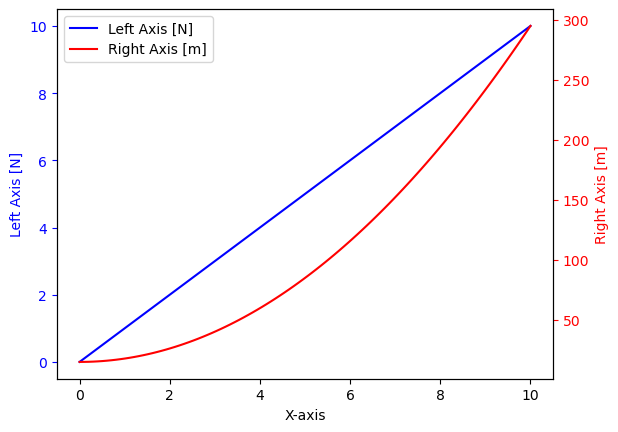

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.linspace(0, 10, 100)
y1 = x  # Sample data for the left axis in [N]
y2 = 2.8 * x**2 +15 # Sample data for the right axis in [m]

# Create a figure and left axis
fig, ax1 = plt.subplots()

# Plot the data for the left axis
ax1.plot(x, y1, color='blue', label='Left Axis [N]')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Left Axis [N]', color='blue')
ax1.tick_params('y', colors='blue')

# Create a twin axis for the right axis
ax2 = ax1.twinx()

# Plot the data for the right axis
ax2.plot(x, y2, color='red', label='Right Axis [m]')
ax2.set_ylabel('Right Axis [m]', color='red')
ax2.tick_params('y', colors='red')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.show()


# checking control volume, editing the values

In [39]:
import My_functions as Mf
import numpy as np
from openpiv import tools

path = r'C:/Users/Morten/OneDrive - mail.tau.ac.il/Thesis/Python Thesis/Analysis/output/test/multy_000.txt'
path_save = r'C:/Users/Morten/OneDrive - mail.tau.ac.il/Thesis/Python Thesis/Analysis/output/test/multy_001.txt'
x,y,u,v = Mf.txt_to_list(path)
x,y,u,v = Mf.txt_to_column(path)

upper = 0.03772349378386995
lower = -0.00037650621613004656
start_x, end_x = 1, 16

start_y_upper, end_y_upper = Mf.find_closest_range_to_values_in_array(y, upper) #return indexs
start_y_lower, end_y_lower = Mf.find_closest_range_to_values_in_array(y, lower) #return indexs

v_upper = v[start_y_upper: end_y_upper][start_x: end_x] # [m/s]
v_lower = v[start_y_lower: end_y_lower][start_x: end_x] # [m/s]

print(v_lower)
v[start_y_upper: end_y_upper][start_x: end_x] = np.ones(len(v[start_y_upper: end_y_upper][start_x: end_x]))*0.5
v[start_y_lower: end_y_lower][start_x: end_x] = np.ones(len(v[start_y_upper: end_y_upper][start_x: end_x]))

print(v[start_y_upper: end_y_upper][start_x: end_x])

tools.save(path_save, x, y, u, v, fmt='%.16e', delimiter='\t')

[-5.3541957261128285e-06 -1.4745902695742908e-05  2.4100717119279899e-05
 -4.6849520134789519e-05 -1.2203384870172294e-04 -9.4468931695128238e-05
 -1.6195391972072604e-04 -3.5114725234865830e-04 -6.0838011786522740e-04
 -3.2920717398424144e-04 -1.9664795427222574e-04 -2.9219799028843015e-04
 -2.0300236543036496e-04  1.9296084595706077e-05  1.3800800036812619e-04]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [40]:
x1,y1,u1,v1 = Mf.txt_to_list(path)
len(x1[0])
print(x1[0][1: 16], len(x1[0][1: 16]))
print(x1[0], len(x1[0]))

[0.006679948995855913 0.009412655403251514 0.012145361810647114
 0.014878068218042715 0.017610774625438315 0.020343481032833916
 0.023076187440229518 0.02580889384762512  0.02854160025502072
 0.03127430666241632  0.03400701306981192  0.03673971947720752
 0.039472425884603125 0.04220513229199872  0.04493783869939432 ] 15
[0.003947242588460312 0.006679948995855913 0.009412655403251514
 0.012145361810647114 0.014878068218042715 0.017610774625438315
 0.020343481032833916 0.023076187440229518 0.02580889384762512
 0.02854160025502072  0.03127430666241632  0.03400701306981192
 0.03673971947720752  0.039472425884603125 0.04220513229199872
 0.04493783869939432  0.047670545106789926] 17


In [1]:
import My_functions as Mf
from openpiv import tools
import scipy
# path = Mf.select_file()
# print(path)
path = r'C:/Users/Morten/OneDrive - mail.tau.ac.il/Thesis/Python Thesis/Analysis/output/test/multy_000.txt'
path_read = path_save
window_size = 18 # pixels
search_area_size = window_size # pixels 
overlap = round(search_area_size/2) # pixels
scale = 0.04 # scale defines here the arrow length
width = 0.003 # width is the thickness of the arrow
threshold = 1.1


tools.display_vector_field(path_read, scale=4, width=width)
x,y,u,v = Mf.txt_to_column(path_read)

sphere_diameter = 0.009525
rho_1 = 1120
rho_2 = 1130

upper = 0.03772349378386995
lower = -0.00037650621613004656
start_x, end_x = 1, 16
sphere_y_vel = -0.028237966209754606

start_y_upper, end_y_upper = Mf.find_closest_range_to_values_in_array(y, upper) #return indexs
start_y_lower, end_y_lower = Mf.find_closest_range_to_values_in_array(y, lower) #return indexs

x_values = x[start_x: end_x] # [m]

v_upper = v[start_y_upper: end_y_upper][start_x: end_x] # [m/s]
v_lower = v[start_y_lower: end_y_lower][start_x: end_x] # [m/s]

w_squared_upper = (np.array(v_upper)-sphere_y_vel)**2 # [m^2 / s^2]
w_squared_lower = (np.array(v_lower)-sphere_y_vel)**2 # [m^2 / s^2]

sum_upper = scipy.integrate.trapz(w_squared_upper, x_values) # [m^3 / s^2]
sum_lower = scipy.integrate.trapz(w_squared_lower, x_values) # [m^3 / s^2]


# the force acting on the WATER:
F_y_el = 4*sphere_diameter*(rho_1*sum_upper - rho_2*sum_lower) # [N]

c:\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


NameError: name 'path_save' is not defined

the_rounder


In [2]:
import My_functions as Mf


a = [[395.1, 477.9649494], [395.0, 550.9849491915984], [465.0, 550.0], [465.0, 477.0]]




Mf.convert_2d_list_to_ints(a)

[[395, 478], [395, 551], [465, 550], [465, 477]]

In [ ]:
import numpy as np
b_array = np.array([[1, 2],[3, 4],[5, 6]])
result_array = np.vstack([b_array, np.tile([10, 10], (55, 1))])
result_array

In [ ]:
import cv2
import My_functions as Mf
import numpy as np
import matplotlib.pyplot as plt


def find_brightest_spot(image_path, max_val1 = 200, alpha = 3, beta = 50, lower_limit = 120, upper_limit = 225):
    # Read the image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    
# Apply contrast adjustment
    adjusted_image = np.clip(gray_image, lower_limit, upper_limit)
    normalized_image = (adjusted_image - lower_limit) / (upper_limit - lower_limit)
    normalized_image = normalized_image * 255
    adjusted_image = normalized_image
    # gray_adjusted = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2GRAY)


    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(adjusted_image)

                    # # If there are multiple bright spots, adjust the image contrast
                    # while max_val > max_val1:  # You can adjust this threshold based on your image
                    #     # Apply contrast adjustment
                    #     adjusted_image = np.clip(gray_image, lower_limit, upper_limit)
                    #     normalized_image = (adjusted_image - lower_limit) / (upper_limit - lower_limit)
                    #     normalized_image = normalized_image * 255
                        
                    #     # alpha = alpha  # Contrast control (1.0 means no change)
                    #     # beta = beta    # Brightness control
                    #     # adjusted_image = cv2.convertScaleAbs(original_image, alpha=alpha, beta=beta)

                    #     # Convert the adjusted image to grayscale
                    #     # gray_adjusted = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2GRAY)

                    #     # Find the new maximum pixel value and its location
                    #     min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_adjusted)
                    #     max_val1 += 1

       


    # Display the adjusted image (optional)
    plt.imshow(adjusted_image, cmap='gray')
    plt.scatter(max_loc[0], max_loc[1], color='red', marker='x')
    plt.scatter(max_loc[1], max_loc[0], color='red', marker='x')
    plt.show()





    # Return the coordinates of the brightest spot
    return max_loc

# Example usage

folder = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot skipped"

brightest_spot = find_brightest_spot(Mf.find_pictures(folder)[0], lower_limit = 120)
print("Brightest spot coordinates:", brightest_spot)


In [ ]:
import cv2
import My_functions as Mf
import numpy as np

def find_brightest_spot(image_path):
    # Read the image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Compute the minimum and maximum pixel values in the image
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_image)

    # If there are multiple bright spots, adjust the image contrast
    if max_val > 200:  # You can adjust this threshold based on your image
        alpha = 2.0  # Contrast control (1.0 means no change)
        beta = 50    # Brightness control
        adjusted_image = cv2.convertScaleAbs(original_image, alpha=alpha, beta=beta)

        # Convert the adjusted image to grayscale
        gray_adjusted = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2GRAY)

        # Find the new maximum pixel value and its location
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_adjusted)

        # Display the adjusted image (optional)
        cv2.imshow("Adjusted Image", adjusted_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    # Return the coordinates of the brightest spot
    return max_loc

# Example usage

folder = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot skipped"

brightest_spot = find_brightest_spot(Mf.find_pictures(folder)[0])
print("Brightest spot coordinates:", brightest_spot)


In [ ]:
import numpy as np
from scipy.signal import convolve2d, fftconvolve
import matplotlib.pyplot as plt

# Create a sample image (replace this with your actual image data)
image = np.array([[1, 2, 1, 0],
                   [0, 1, 2, 1],
                   [1, 0, 1, 2],
                   [2, 1, 0, 1]])

# Create a sample kernel (replace this with your actual kernel)
kernel = np.array([[1, 0],
                   [0, -1]])

# Perform convolution
result = convolve2d(image, kernel, mode='valid')
result1 = fftconvolve(image, kernel, mode='valid')

# Display the original image, kernel, and result
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# plt.subplot(102)
# plt.imshow(kernel, cmap='gray')
# plt.title('Kernel')

plt.subplot(132)
plt.imshow(result, cmap='gray')
plt.title('Convolution Result')

plt.subplot(133)
plt.imshow(result1, cmap='gray')
plt.title('Convolution Result')

plt.show()

In [ ]:
import My_functions as Mf
import numpy as np
from scipy import signal

folder = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot skipped"
objjj = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\object.png"
# sig = Mf.read_image(Mf.find_pictures(folder)[0]).standard_normal(1000)
img = Mf.read_image(Mf.find_pictures(folder)[100])
img = img-img.mean()
objy = Mf.read_image(objjj)
# objy= objy-objy.mean()
autocorr = signal.fftconvolve(img, objy[::-1], mode='same')
autocorr = signal.fftconvolve(img, objy, mode='same')
max_index = np.argmax(autocorr)
print(autocorr.shape,objy.shape)
# Convert the flattened index to 2D coordinates
max_coordinates = np.unravel_index(max_index, autocorr.shape)
print(max_coordinates)
import matplotlib.pyplot as plt
# Plot the image
plt.imshow(img, cmap='gray')  # Use 'gray' colormap for grayscale images

# Plot scatter points on top of the image
plt.scatter(max_coordinates[0], max_coordinates[1], color='red', marker='x', s=50)

# Show the plot
plt.show()

plt.imshow(autocorr)  # Use 'gray' colormap for grayscale images
plt.scatter(max_coordinates[0], max_coordinates[1], color='red', marker='x', s=50)



In [ ]:
import My_functions as Mf
import numpy as np
# asd = np.array([[1,2],[3,4],[5,6]])
# asdy =np.append(asd, [[1,2]], axis=0)
# asdy
# Mf.skip_cells([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 5)
folder = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot skipped"
# Mf.transform_coordinates_pysical([[387,300], [387,300]], folder, 1)
Mf.display_images_with_points_napari(folder)

black traingle

In [ ]:
import My_functions as Mf
folder = r"C:\Users\Morten\Desktop\snapshot diameter 9.5252 2023 11 01"
files = Mf.find_pictures(folder)
for imggg in files:
    image = Mf.read_image(imggg)
    dims = image.shape
    sizeeee = 240
    vertices = [(dims[1]-sizeeee, dims[0]), (dims[1], dims[0]-sizeeee), (dims[1], dims[0])] 
    Mf.draw_filled_triangle(imggg, vertices)

In [ ]:
import My_functions as Mf
import matplotlib.pyplot as plt
import numpy as np

aa = Mf.read_image(r"C:\Users\Morten\Desktop\Screenshot 2023-08-02 142234.png", False)
print(aa.shape)
aa90 = Mf.rotate_image(aa, 30)
plt.imshow(aa90, cmap='gray')  # cmap='gray' for grayscale images
plt.show()

In [ ]:
import My_functions as Mf
import os
parent_folder = os.path.dirname(os.getcwd()) #on notebok only. in .py file its different
pic_folder = os.path.join(parent_folder, 'Picture', 'alot')

print(pic_folder)

# print(Mf.select_circle_napari_advance(pic_folder))
Mf.replace_elements_2([[500, 600]])[0]

In [ ]:
def calc_density(sphere_diameter = 9.525/1000, fluid_density = 998, nu1 = 8.89533333333333e-07, free_fall_U = 0.169):
    from scipy.constants import pi, g
    import sympy as sy
    from scipy.optimize import fsolve
    
    sphere_volume = 4/3*pi*(sphere_diameter/2)**3 #sphere volume [m^3]

    rho_f, rho_s, a, U, Ab, Vb, g1, nu= sy.symbols('rho_f, rho_s, a, U, A_b, V_b, g, nu')

    Ab1 = sy.pi*a**2/4 #the projected surface area
    Re = U*a/nu
    Cd = 0.4+24/Re+6/(1+sy.sqrt(Re))

    Fd = Cd*rho_f*U**2*Ab/2
    F_B = rho_f*Vb*g1
    MG = rho_s*g1*Vb

    the_eq = Fd+F_B-MG


    the_eq_1 = the_eq.subs([(rho_f, fluid_density), (U, free_fall_U),
                        (nu, nu1), (Vb, sphere_volume), (Ab, Ab1),(a, sphere_diameter), (g1, g)])
    # rho_s, sphere_density
    equa1 = sy.lambdify(rho_s, the_eq_1, "numpy")
    the_density = fsolve(equa1, 1)
    print(the_density[0])
    # the_density_1 = the_density[0]
calc_density()

In [ ]:
import pyautogui 
pic_path = r'C:\\Users\\Morten\\Desktop\\template.png'
print(pyautogui.locateAllOnScreen(pic_path))
# print(pyautogui.locateOnScreen(pic_path))

In [ ]:
import My_functions as Mf
import os
parent_folder = os.path.dirname(os.getcwd()) #on notebok only. in .py file its different
scaling_factor_pic = os.path.join(parent_folder, 'Picture', 'scaling factor')


save_folder = os.path.join(parent_folder, 'output', 'Multy')
pic_folder = os.path.join(parent_folder, 'Picture', 'alot')

Mf.transform_coordinates_pysical([[150,60], [150,61], [150,62], [150,63]], pic_folder, 10, [10,10])

Mf.velocity_from_location(sphere_location = [[10, 10], [11, 11], [12, 12], [15, 15]], dt = [1,1,3])


import napari
import numpy as np
import time

def calculate_distance_between_points_napari_notebook(image_path : str, title = 'Select diameter with 2 points'):
    diameter = 0
    viewer = napari.Viewer(title = title, axis_labels=['y', 'x'])
    viewer.add_image(Mf.read_image(image_path), name='Image')
    # points_layer = viewer.add_points(name='Points', size=1, face_color='red')
    line_layer = viewer.add_shapes(data=[[500,500], [500,530]], shape_type='line', edge_color='red', edge_width=2, name='Line')


    viewer.axes.visible = True
    viewer.scale_bar.unit = "pixel"
    viewer.scale_bar.visible = True
    viewer.scale_bar.colored = True

    # @viewer.bind_key('Enter')
    def accepted_length(viewer):
        nonlocal diameter
        print(line_layer.data[0])

        point1, point2 = line_layer.data[0][0], line_layer.data[0][1]
        diameter = np.linalg.norm(point1 - point2)

    viewer.bind_key('Enter', lambda v: accepted_length(v))
    viewer.show(block=True)

    if len(line_layer.data[0]) >= 2:
        point1, point2 = line_layer.data[0][0], line_layer.data[0][1]
        diameter = np.linalg.norm(point1 - point2)
    return diameter


lenrr = Mf.calculate_distance_between_points_napari_notebook_line(Mf.find_pictures(pic_folder)[0])
lenrr

In [ ]:
import My_functions as Mf
import os

# a = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 08 10'
# a = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 09 20'
# a = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures'

# def list_folders_in_path(path, full_path = True):
#     if full_path:
#         folders = [os.path.join(path, f) for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
#     else:
#         folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
#     return folders

# foldersy = list_folders_in_path(a)
# foldersyy = foldersy[7]
# foldersyy = foldersy[8]
# print(foldersyy)
# folders = list_folders_in_path(foldersyy)

# for el in folders:
#     # Mf.select_directory()
#     # a = a[:-1] + str(i)
#     print(os.path.basename(el))
#     Mf.display_photos_as_video_cv(el, 200)

a = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot'
Mf.display_images_with_points_napari(a)

find $\mu$

In [ ]:
import My_functions as Mf
#bouncing ball

print((1113.93, 1122.24), '             ', Mf.calc_parameters(sphere_diameter=10.07/1000, sphere_density=1123.7, fluid_density = (1113.93, 1122.24), nu = (1.43e-6, 1.012e-6)))

In [ ]:
l='c:\\Users\\Morten\\OneDrive - mail.tau.ac.il\\Thesis\\Python Thesis\\Analysis\\Picture\\alot\\C001H001S0003000260.tif'
l[-7:-4]

In [ ]:

target = [(890, 4580), (0,0), (1, 1), (2, 2), (20, 70), (10, 12), (300, 450), (890, 450)]
target[1:]

In [ ]:
np.round(16.4999), round(16.4999)

In [ ]:
empty_list = [None] * 7
empty_list

In [ ]:
import My_functions as Mf
import numpy as np
# Example usage:
base = [(1, 1), (10, 12), (300, 450)]
target = [(890, 450), (898, 4), (0,0), (1, 1), (2, 2), (20, 70), (10, 12), (300, 450), (890, 450), (1,7)]
# target = [(1, 1), (2, 2), (20, 70), (10, 12), (300, 450), (890, 450)]
result = Mf.match_closest_points_to_shorter_list(target, base)
# print(result)
# mass=-1
# for el in result:
#     for ely in el:
#         mass = max(mass, ely)
# print(mass)
# maxy = np.max(np.array(result))






Mf.calc_velocity_from_acceptable_error_full_lenght(target, 1, 1,1)
# Mf.append_the_same_value()
result = Mf.match_closest_points_to_shorter_list(target, base)
velocitys_meter = Mf.append_the_same_value(base[:-1], result)
velocitys_meter

In [ ]:
import numpy as np

a = np.array([(12, 50), (14, 38)])

# Calculate the average between every two points
averages = np.mean(a, axis=0)

# Reshape the result to match the desired output format
averages = averages.reshape(1, -1)

print(averages)

In [ ]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]

import My_functions as Mf

Mf.skip_cells(a,7)

In [ ]:
import My_functions as Mf
print(Mf.calculate_distance_between_points_napari(r"C:\Users\Morten\Desktop\Screenshot 2023-08-02 142234.png"))

In [ ]:
1.43e-6*1123

In [ ]:


a = 10.000000000  # replace this with the value you want to check

if a.is_integer():
    print(f"{int(a)} is an integer.")
if isinstance(a, float):
    print(f"{a:.1f} is a float.")
else:
    print("The variable 'a' is neither an integer nor a float.")



In [ ]:
import os
import My_functions as Mf

def skip_cells(a, place : int = 5):
    return [a[i] for i in range(len(a)) if i % place == 0]
a1 = [11,232,3,4,45,2346,734,88,9,910,11,12,6613,164,15,16]
print(skip_cells(a1, 3))

def delete_files(file_paths):
    for file_path in file_paths:
        if os.path.isfile(file_path):
            os.remove(file_path)
        else:
            print(f"Error: {file_path} not found.")

def find_elements(a, b):
    return [item for item in b if item not in a]

all_files = Mf.files_in_folder(r'C:/Users/Morten/OneDrive - mail.tau.ac.il/Thesis/Python Thesis/Analysis/Picture/alot', 'tif', True)
to_save = skip_cells(all_files, 3)
to_del = find_elements(to_save, all_files)
print(len(to_save), len(all_files))
# print (all_files)
# delete_files(to_del)

In [ ]:
from pathlib import Path
import os
p = Path('E:\\x\\y\\z')
if isinstance(p, os.PathLike):
    print(p)

# print(os.path(p))
str(p)

In [ ]:
def skip_cells(a, place : int = 5):
    return [a[i] for i in range(len(a)) if i % place == 0]
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
skip_cells(a)

(slice(450, 700), slice(400, 500))[0].stop

In [ ]:
import os
import My_functions as Mf
import matplotlib.pyplot as plt
import numpy as np
import cv2
parent_folder = os.path.dirname(os.getcwd()) #on notebok only. in .py file its different
scaling_factor_pic = os.path.join(parent_folder, 'Picture', 'scaling factor')


save_folder = os.path.join(parent_folder, 'output', 'Multy')
pic_folder = os.path.join(parent_folder,'Picture', 'alot')
multy_cut_image = 'multy_cut_image'
multy_cut_image_folder = os.path.join(pic_folder, multy_cut_image)
# pic_folder = Mf.select_directory()

In [ ]:
import numpy as np

# Your data
data = np.array([1.123456789123456789, 2.987654321987654321])

# Save data with highest precision
np.savetxt(r'C:\Users\Morten\Desktop\yourfile.txt', data, fmt='%.18e')
np.set_printoptions(precision=18)

data_read = np.loadtxt(r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\output\Multy\multy_000.txt')
data_read.shape
data_read[:, 0][15] - 0.025757575757575757

In [ ]:
image = cv2.imread(Mf.find_pictures(pic_folder, True)[0])
image = cv2.applyColorMap(image, cv2.COLORMAP_JET)
# cv2.imwrite(os.path.join(pic_folder,'agay.tif'), image)
cv2.imshow('gy', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Mf.find_diameter(Mf.find_pictures(multy_cut_image_folder, True)[0], True,200,600, printy=True)
import matplotlib.pyplot as plt
ala = Mf.load_pickle(os.path.join(save_folder, 'testy_home.pkl'))
cor = ala[0][0]
prior = ala[1][0]
print(cor, prior)
new_cor = Mf.enhance_coordinates(Mf.find_pictures(pic_folder, True)[0],cor, printy=True, bias = 36)

img = cv2.imread(Mf.find_pictures(pic_folder, True)[0], cv2.COLOR_BGR2GRAY)

print(new_cor)
plt.title('old')
plt.imshow(img)
plt.scatter(cor[0], cor[1], c ='red')
plt.show()
plt.close()

plt.title('new')
plt.imshow(img)
plt.scatter(new_cor[0], new_cor[1], c ='red')
plt.show()


In [ ]:
# real_cor = Mf.select_circle(Mf.find_pictures(pic_folder, full_path = True)[0], title = 'Select circle - Fine tuning')[0]
Mf.display_images_as_video(multy_cut_image_folder)

In [ ]:
def get_bgr(color_char):
    # Define the BGR values for blue, green, red, and yellow
    colors = {
        'black': (0, 0, 0),   # black
        'white': (255, 0, 0),   # black
        'b': (255, 0, 0),       # Blue
        'g': (0, 255, 0),       # Green
        'r': (0, 0, 255),       # Red
        'y': (0, 255, 255),     # Yellow
        'cyan': (255, 255, 0),  # Cyan
        'c': (255, 255, 0),     # Cyan
    }
    return colors.get(color_char.lower(), (0, 0, 0))  # Default to black if color_char is not recognized
get_bgr('c')

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(Mf.find_pictures(pic_folder,True)[0])
image = cv2.imread(Mf.find_pictures(pic_folder,True)[0], cv2.COLOR_BGR2GRAY)

# first_image = cv2.imread(im_a_path, cv2.COLOR_BGR2GRAY)
x111, y111, h111, w111 = 50, 50, 700, 700
object_range_cut = slice(y111, y111 + h111), slice(x111, x111 + w111)
fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(image[object_range_cut])
plt.show()


# Display the image with OpenCV
cv2.imshow('Image', image)

# Wait for a key press and close the window afterwards
cv2.waitKey(0)
cv2.destroyAllWindows()

colored_image = cv2.applyColorMap(image, cv2.COLORMAP_JET)
cv2.imshow('Colored Image', colored_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


# Function to handle mouse events
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        font = cv2.FONT_HERSHEY_SIMPLEX
        strXY = str(x) + ', ' + str(y)
        cv2.putText(image, strXY, (x, y), font, 0.5, (255, 255, 0), 2)
        cv2.imshow('image', image)

# Load an image
# img = cv2.imread('image.jpg', 1)
cv2.imshow('image', image)

# Set mouse callback function to window
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
import cv2
import My_functions as Mf

# Load an image
image = cv2.imread(Mf.find_pictures(pic_folder,True)[0], cv2.COLOR_BGR2GRAY)

img_copy = image.copy()  # Create a copy of the original image

# Function to handle mouse events
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        image = img_copy.copy()  # Reset the image to its original state
        print(x, ', ', y)
        font = cv2.FONT_HERSHEY_SIMPLEX
        strXY = str(x) + ', ' + str(y)
        cv2.putText(image, strXY, (x, y), font, 0.5, (255, 255, 0), 2)
        cv2.imshow('image', image)

cv2.imshow('image', image)

# Set mouse callback function to window
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fft_correlation(img: np.ndarray | list, template: np.ndarray | list, show: bool = False):
    # ... (Rest of the function as provided in the original code) ...

    # Compute 2D FFT of the image and template
    img_fft = np.fft.fft2(img)
    template_fft = np.fft.fft2(template, s=img.shape)

    # Compute cross-correlation in the frequency domain
    cross_correlation_fft = img_fft * np.conj(template_fft)

    # Perform inverse FFT to obtain the cross-correlation in the spatial domain
    cross_correlation = np.fft.ifft2(cross_correlation_fft)

    y, x = np.unravel_index(np.argmax(np.abs(cross_correlation)), cross_correlation.shape)
    # Plot the cross-correlation and its difference with line 6
    if show:
        plt.figure(figsize=(12, 6))

        # Plot cross-correlation from line 6
        plt.subplot(1, 3, 1)
        plt.title("Cross-correlation from line 6")
        plt.imshow(np.abs(cross_correlation), cmap='hot')
        plt.colorbar()

        # Plot cross-correlation from line 7
        plt.subplot(1, 3, 2)
        plt.title("Cross-correlation from line 7")
        plt.imshow(np.abs(cross_correlation_fft), cmap='hot')
        plt.colorbar()

        # Plot the difference between the two
        plt.subplot(1, 3, 3)
        plt.title("Difference")
        difference = np.abs(cross_correlation) - np.abs(cross_correlation_fft)
        plt.imshow(difference, cmap='hot')
        plt.colorbar()

        plt.show()

    return x, y

# Test the function with some example data

img = np.random.random((256, 256))  # Random image for testing
template = np.random.random((32, 32))  # Random template for testing
x, y = fft_correlation(img, template, show=True)
x,y


In [ ]:
import numpy as np
import cv2
img = np.random.random((256, 256))  # Random image for testing
imgy = img.tolist()
print(type(imgy))
print(type(img))
object_pattern = np.array( [[1,2,3],[4,5,6],[7,8,9]])
print(img)
# img = cv2.cvtColor(object_pattern, cv2.COLOR_BGR2GRAY)
cv2.imshow('gay', img)
cv2.waitKey(3333) 
  
# closing all open windows 
cv2.destroyAllWindows() 
# img

In [ ]:
a = ['abc', 'cdf', 'john']
'john' in a
import numpy as np

object_pattern = np.array([[1,2,3],[4,5,6],[7,8,9]])
new_image = np.arange(1 * 19).reshape(1, 19)
print(new_image.shape, object_pattern.shape)
object_pattern.shape[0] > new_image.shape[0] or object_pattern.shape[1] > new_image.shape[1]

In [ ]:
import numpy as np
w111 = 9
if w111%2 == 1:
        w111 = w111+1
w111


object_pattern = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(object_pattern)


print(object_pattern.shape)
if np.array(object_pattern).shape[1] % 2 == 1:
       object_pattern = np.copy(object_pattern)[:, :-1]
print(object_pattern.shape)
if np.array(object_pattern).shape[0] % 2 == 1:
        print('ok')
        object_pattern = np.copy(object_pattern)[:-1, :]
object_pattern
# cut_object_pattern = object_pattern[:-1, :]
# cut_object_pattern

In [ ]:
import My_functions as Mf
import os
parent_folder = os.path.dirname(os.getcwd()) #on notebok only. in .py file its different
pic_folder = os.path.join(parent_folder,'Picture', 'alot')
Mf.find_fps(pic_folder)

In [ ]:
import cv2

class ROISelector:
    def __init__(self, image):
        self.image = image.copy()
        self.selection = None
        self.start = None
        self.end = None
        self.selected = False

    def update_image(self):
        img_copy = self.image.copy()
        if self.selection is not None:
            x, y, w, h = self.selection
            cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.imshow('ROI Selection', img_copy)

    def run(self):
        cv2.namedWindow('ROI Selection')
        cv2.setMouseCallback('ROI Selection', self.mouse_callback)
        self.update_image()

        while True:
            key = cv2.waitKey(33) & 0xFF

            if key == ord('r'):
                self.selection = None
                self.update_image()
            elif key == 13:  # Enter key
                if self.selected:
                    return self.selection
            elif key == ord('+'):
                if self.selection is not None:
                    self.selection = (self.selection[0] - 1, self.selection[1] - 1, self.selection[2] + 2, self.selection[3] + 2)
                    self.update_image()
            elif key == ord('-'):
                if self.selection is not None and self.selection[2] > 2 and self.selection[3] > 2:
                    self.selection = (self.selection[0] + 1, self.selection[1] + 1, self.selection[2] - 2, self.selection[3] - 2)
                    self.update_image()
            elif key == ord('w') and self.selection is not None:
                self.selection = (self.selection[0], self.selection[1] - 1, self.selection[2], self.selection[3])
                self.update_image()
            elif key == ord('s') and self.selection is not None:
                self.selection = (self.selection[0], self.selection[1] + 1, self.selection[2], self.selection[3])
                self.update_image()
            elif key == ord('a') and self.selection is not None:
                self.selection = (self.selection[0] - 1, self.selection[1], self.selection[2], self.selection[3])
                self.update_image()
            elif key == ord('d') and self.selection is not None:
                self.selection = (self.selection[0] + 1, self.selection[1], self.selection[2], self.selection[3])
                self.update_image()
        

    def mouse_callback(self, event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.start = (x, y)
            self.selected = False
        elif event == cv2.EVENT_LBUTTONUP:
            self.end = (x, y)
            self.selection = (min(self.start[0], self.end[0]), min(self.start[1], self.end[1]),
                              abs(self.start[0] - self.end[0]), abs(self.start[1] - self.end[1]))
            self.selected = True
            self.update_image()



# selector = ROISelector(first_image)
# y111, h111, x111, w111 = selector.run()
# cv2.destroyAllWindows()
# # cv2.destroyAllWindows()

import My_functions as Mf
import os
import matplotlib.pyplot as plt

what_folder = 'alot'

parent_folder = os.path.dirname(os.getcwd()) #on notebok only. in .py file its different
pic_folder = os.path.join(parent_folder, 'Picture', what_folder)

first_image_path = Mf.find_pictures(pic_folder, True)[0]


# first_image = cv2.imread(first_image_path, cv2.COLOR_GRAY2BGR)
first_image = cv2.imread(first_image_path)

x111, y111, w111, h111 = cv2.selectROI('Select the Object for future analysis', first_image)
cv2.destroyAllWindows()
x1111, y1111, w1111, h1111 = cv2.selectROI('Select the Object for future analysis', first_image)
cv2.destroyAllWindows()
# prior_knowlage = [y1111, y1111 + h1111, x1111, x1111 + w1111] #[y1, y2, x1, x2]
prior_knowlage = slice(y1111, y1111 + h1111), slice(x1111, x1111 + w1111)
object_range_cut = slice(y111, y111 + h111), slice(x111, x111 + w111)

Mf.track_object(first_image[object_range_cut], first_image_path, bias = [1 ,1], prior_knowledge = prior_knowlage, show = True, showy = True)

In [ ]:
import os
pic_folder = os.path.join(parent_folder, 'Picture', what_folder)

first_image_path = Mf.find_pictures(pic_folder, True)[0]
if type(first_image_path) is str:
    print('ok')
type(first_image_path)

In [ ]:
import cv2
import numpy as np

def is_grayscale(image):
    # Check if the image has a single channel (indicating grayscale)
    return len(image.shape) == 2

def convert_to_grayscale(image):
    if is_grayscale(image):
        print('ok')
        return image
    else:
        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return grayscale_image

# Example usage:
# Load an image as a NumPy array (make sure to replace 'your_image.jpg' with the actual image file)
image = cv2.imread(first_image_path)

# Check if it's grayscale and convert if needed
grayscale_result = convert_to_grayscale(image)

# Display or save the grayscale image as needed
# If it's already grayscale, 'ok' will be printed.
grayscale_result

In [ ]:
ord('+')


In [ ]:
import cv2
import os
import My_functions as Mf


what_folder = 'alot'

parent_folder = os.path.dirname(os.getcwd()) #on notebok only. in .py file its different
pic_folder = os.path.join(parent_folder, 'Picture', what_folder)

first_image_path = Mf.find_pictures(pic_folder, True)[0]


first_image = cv2.imread(first_image_path)
x111, y111 , w111, h111 = cv2.selectROI('Select relevant search area for all trajecory', first_image)
cv2.destroyAllWindows()


In [ ]:
import My_functions as Mf
import pickle
import os
# file_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\test\a.pkl'
# Mf.save_pickle(file_path, [1,2,3,4,5])
# Mf.load_pickle(file_path)

athyy = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\test'
a = Mf.files_in_folder(athyy, 'tif', True)
print(a[0])
print(os.path.join(athyy, a[0]))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapz


vel = [0.45, 1.79, 4.02, 7.15, 11.18, 16.09, 21.90, 29.05, 29.05, 29.05, 29.05, 29.05, 22.42, 17.9, 17.9, 17.9, 17.9, 14.34, 11.01, 8.9, 6.54, 2.03, 0.55, 0]
vel = np.array([2,3,4,5,6,7,8])
print(vel)
x = np.arange(0, len(vel)*2, 2)
# t = np.array([0,2,4,6,8,10,12])
print(len(x),len(vel), '\n', x)

plt.scatter(x, vel)
plt.plot(x, vel)

print('if the x value is not linear...', trapz(vel, x),'\ndefault, x is linear: ', trapz(vel))

print('\nnow vel = vel**2')
vel = vel**2
plt.scatter(x, vel)
plt.plot(x, vel)

print('if the x value is not linear...', trapz(vel, x),'\ndefault, x is linear: ', trapz(vel))

In [ ]:
from PIL import Image
import numpy as np

im_a_path = r'C:\Users\Morten\Desktop\Test.png'
img = np.asarray(Image.open(im_a_path))
img.shape

In [ ]:
import cv2
import My_functions as Mf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot\C001H001S0004000359.tif'


rangey_cut = slice(350, 500), slice(420,600)

fig, ax = plt.subplots(figsize=(7,7))
img = np.asarray(Image.open(im_a_path))
# imgy = img[::-1]
imgy = np.copy(img)

# plt.imshow(imgy, origin='lower') # make sure the origin is left bottom corner


plt.imshow(imgy) # make sure the origin is left bottom corner
plt.scatter(0,0, s=100, c='yellow')
# plt.scatter(sphere_location[ind][0]*scaling_factor, sphere_location[ind][1]*scaling_factor, s=100, c='red')
# print(os.path.join(multy_cut_image_folder, pictures_list[ind]), sphere_location[ind], sphere_location[ind][0]*scaling_factor, sphere_location[ind][1]*scaling_factor)
plt.show()

imgy2 = np.copy(imgy)[rangey_cut]
# plt.imshow(imgy2, origin='lower') # make sure the origin is left bottom corner


plt.imshow(imgy2) # make sure the origin is left bottom corner
plt.scatter(0,0, s=100, c='yellow')
# plt.scatter(sphere_location[ind][0]*scaling_factor, sphere_location[ind][1]*scaling_factor, s=100, c='red')
# print(os.path.join(multy_cut_image_folder, pictures_list[ind]), sphere_location[ind], sphere_location[ind][0]*scaling_factor, sphere_location[ind][1]*scaling_factor)
plt.show()

new_cor = Mf.find_the_slice(str(im_a_path), imgy2, path = False, prior_knowledge=rangey_cut)
new_cor

In [ ]:
# rangey_cut = slice(350, 500), slice(420,600)

yrangey_cut = slice(new_cor[0], new_cor[1]), slice(new_cor[2], new_cor[3])

plt.imshow(imgy[yrangey_cut]) # make sure the origin is left bottom corner
plt.show()

In [ ]:
yrangey_cut[0].start, yrangey_cut[0].stop, yrangey_cut[1].start, yrangey_cut[1].stop
PIV_origin_location=[(350, 500, 420,600), (349, 499, 419, 599)]
PIV_origin_location_meter = [[h[2] / 1, (700-h[1]) / 1] for h in PIV_origin_location]
PIV_origin_location_meter

In [ ]:
from natsort import natsorted
import pathlib
pathlib.Path
data_dir = pathlib.Path(r'c:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot\Orginazed Patterns')
pattern_a = 'Pattern_*_a.tif'
pattern_b = 'Pattern_*_b.tif'


def natural_sort(file_list):
    """ Creates naturally sorted list """
    # convert = lambda text: int(text) if text.isdigit() else text.lower()
    # alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    # return sorted(file_list, key=alphanum_key)
    return natsorted(file_list, key=str)


files_a = natural_sort(list(data_dir.glob(pattern_a)))

# print(f'List of files:')
# print(f'{self.files_a}')


files_b = sorted(data_dir.glob(pattern_b))

# number of images
n_files = len(files_a)

print(files_a)
print(files_b)


In [ ]:
print(ord('W'), ord('w'))
print(ord('S'), ord('s'))
print(ord('A'), ord('a'))
print(ord('D'), ord('d'))
print(ord('R'), ord('r'))

In [ ]:
len((1,1))
import My_functions as Mf
asas = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot'
aaa = Mf.find_pictures(asas)
aaa

In [ ]:
import os
a = os.path.join(r'C:\Program Files','data')
print(type(a))

In [ ]:
import cv2
import My_functions as Mf
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot\C001H001S0004000359.tif'


first_image = cv2.imread(im_a_path)
x111, y111 , w111, h111  = cv2.selectROI('Select the Area of prior knowlage to make anlysis faster, must be large', first_image)
cv2.destroyAllWindows()

object_range_cut = slice(y111, y111 + h111), slice(x111, x111 + w111)

first_image = cv2.imread(im_a_path, cv2.COLOR_BGR2GRAY)
object_array = first_image[object_range_cut]



In [ ]:
x111, y111 , w111, h111  = cv2.selectROI('Select the Area of prior knowlage to make anlysis faster, must be large', first_image)
cv2.destroyAllWindows()
prior_knowledge = slice(y111, y111 + h111), slice(x111, x111 + w111)
# Mf.track_object_multi
corr_a = Mf.track_object_multi(object_array, im_a_path, enable_bias=False, prior_knowledge = prior_knowledge)

corr_a

In [ ]:
s = "That I ever did see. Dusty as the handle on the door"

if "kush" in s:
    print("query found")

In [ ]:
PIV_selecion_location = [(10,12,79,85),(10,12,79,85)]
x_max_in_pixel = 100
y_max_in_pixel = 50
PIV_selecion_location = [[(x_max_in_pixel-h[2]) / 1, (y_max_in_pixel-h[1]) / 1] for h in PIV_selecion_location]
PIV_selecion_location

In [ ]:

def track_object_multi(pattern, image_path:str, bias : list ,show = False, showy = False, cutted = None, prior_knowledge = False, enable_bias:bool = True):
    '''
    recive:
      pattern - the cutted rectangle img, a 2d arrray grayscale
      bias - the pixels change in x and y for the real center of circle.
      image_path the image we search the object

      ###
      CUTTED HASEN'T BEEN TESTED YET
      ####
    return:
     coordinates of the object, in cutted is known changing the coordinates acoordinaly,
    cutted should be in the form of cutted= [220, 800, 180, 380] #[y1, y2, x1, x2], just like slicing image in numpy
    show is to plot if wanted
    adjust_coordinate if True, changes the coordinates accordint to the sphere selction
    '''
    if showy:
        plt.title('selected Image')
        plt.imshow(pattern)
        plt.show()

    # List to store the tracked object positions
    tracked_positions = []

    image = Image.open(image_path).convert('L')
    imageyyyy = np.array(image)
    if prior_knowledge is not False:
        imageyyyy = np.copy(imageyyyy[prior_knowledge])

    x1, y1 = Mf.correlate2d_for_me(imageyyyy, pattern)
    if prior_knowledge is not False:
        y1 = y1 + prior_knowledge[0].start
        x1 = x1 + prior_knowledge[1].start
    
  
    tracked_positions.append((int(x1 - pattern.shape[1]/2), int(y1 - pattern.shape[0]/2)))
    
    if not cutted is None:
        a, b, c, d = cutted
        tracked_positions = [(x+c, y+a) for (x, y) in tracked_positions]
        print('This is the coordinates of the ORIGINAL photos.')

    if enable_bias:
        tracked_positions = [(int(x - bias[0]), int(y - bias[1])) for (x, y) in tracked_positions]
    
    if show:
        if enable_bias:
            plt.title('taken into account adjust_coordinate')
        else:
            plt.title('Did not take into account adjust_coordinate')
        plt.scatter(tracked_positions[-1][0],tracked_positions[-1][1])
        plt.imshow(image)
        plt.show()

    return tracked_positions[0]



import cv2
import My_functions as Mf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot\C001H001S0004000359.tif'

first_image = cv2.imread(im_a_path)
x111, y111 , w111, h111 = cv2.selectROI('Select the Object for future analysis', first_image)
cv2.destroyAllWindows()

range_cut = slice(y111, y111 + h111), slice(x111, x111 + w111)

first_image = cv2.imread(im_a_path, cv2.COLOR_BGR2GRAY)
object_array = first_image[range_cut]

real_cor = Mf.select_circle(im_a_path)[0]
bias_x, bias_y = x111 + w111/2 - real_cor[0], y111 + h111/2 - real_cor[1]

x2111, y2111 , w2111, h2111  = cv2.selectROI('Select the Area of prior knowlage to make anlysis faster, must be large', first_image)
cv2.destroyAllWindows()


prior_knowledge = slice(y2111, y2111 + h2111), slice(x2111, x2111 + w2111)

corr_a = track_object_multi(object_array, im_a_path, bias = [bias_x, bias_y], show = True, prior_knowledge = prior_knowledge)


In [ ]:
corr_a

In [ ]:
real_cor

In [ ]:
print(first_image.shape[1]-(x111+w111/2 + bias_x), corr_a,real_cor)

In [ ]:
import numpy as np

def find_elements_in_circular_region(arr, R):
    """
    Find elements in a 2D array representing distances from the origin
    that are within a circular region with radius R and have values greater
    than or equal to R.

    Parameters:
        arr (numpy.ndarray): The 2D array of distances.
        R (float): The radius of the circular region.

    Returns:
        List of tuples: A list of tuples containing the indices of elements
        in the circular region meeting the criteria.
    """
    # Create a boolean mask for the circular region with radius R
    circular_mask = (arr >= R) & (arr < (R + 1))  # Adjust the range as needed

    # Find the indices of elements within the circular region
    indices_in_circular_region = np.argwhere(circular_mask)
    print(indices_in_circular_region)
    
    # Collect all elements in the circular region that meet the criteria
    elements_in_circular_region = []

    for idx in indices_in_circular_region:
        i, j = idx
        distance = arr[i, j]
        if distance >= R:
            elements_in_circular_region.append((i, j))

    return elements_in_circular_region

# Example usage:
# Create a sample 2D array
sample_array = np.array([[np.sqrt(i**2 + j**2) for j in range(100)] for i in range(100)])

# Define the known radius R
R = 40

# Find elements in the circular region meeting the criteria
result = find_elements_in_circular_region(sample_array, R)

# Print the result
print("Elements in the circular region meeting the criteria:")
for element in result:
    print("Index:", element, "Value:", sample_array[element[0], element[1]])


In [ ]:
import numpy as np
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
print(a[2:10])
a[2:10][1:4]

ab = np.array(a)
print(ab-2)

np.rad2deg(np.arctan2(4,3))



x = np.array([[1,2,3],[1,2,3],[1,2,3]])-1
y = np.array([[1,1,1],[2,2,2],[3,3,3]])-1
u = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
v = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

# print(x,'\nx\n', y, '\n\n\nxxxxx \n', v, 'xxxxx \n',u)

# v = np.array([[1,2,3,4],[5,6,7,8],[10,11,12,13],[14,15,16,17]])
# v = v[::-1]
# # v = np.flipud(v)


import My_functions as Mf
r,t,vr,vt = Mf.cartesian_to_polar(x, y, u, v, (1, 1))
print('\n', r,'\n','\n',t,'\n','\n',vr,'\n','\n',vt)

ssds = Mf.find_circumrence(r)
r[ssds]

In [ ]:
rr = np.array([
    [90,80,70,60,50],[3.1,2.3,2,2.3,3.1],[2.8,1.2,1,1.2,3],[2,1,0,1,2],[2.8,1.2,1,1.2,3],[3,2.4,2,2.4,3],[80,70,60,2,50]
])
rr

In [ ]:
eleo = find_elements_in_circular_region(rr, 2)
for el in eleo:
    print(rr[el])

In [ ]:
def create_sink(x,y):
    u = np.copy(x)
    v = np.copy(x)
    for i in range(len(x)):
        for j in range(len(y)):
            u[i,j] = 1/(np.sqrt(x[i,j]**2+y[i,j]**2))



In [ ]:
import os
import numpy as np
from PIL import Image
import imageio

abb = r'C:\Users\Morten\Desktop\asd.jpg'

base_name, extension = os.path.splitext(abb)
new_base_name = base_name + '_1'
new_filename = os.path.join(os.path.dirname(abb), new_base_name + extension)

# Load the image
imgy = Image.open(abb)
img = np.array(imgy)
imgye = np.copy(img)

threshold = 2
for el in range(len(img)):
    for elel in range(len(img[el])):
        if img[el][elel][0] <= threshold and img[el][elel][1] <= threshold and img[el][elel][-1] <= threshold:
            imgye[el][elel][0] = imgye[el][elel][1] = imgye[el][elel][-1] = 255


# Save the new array as the new image
imageio.imwrite(new_filename, imgye)


In [ ]:
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\two\run2_C001H001S0001002271.tif'
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\Radius pictures\a.tif'

In [ ]:
print(ord("ג"))

In [ ]:
import cv2
import copy

def draw_circle(event,x,y,flags,param):
    global img
    global cache
    if event == cv2.event_lbuttondblclk:
        cache = copy.deepcopy(img)
        cv2.circle(img,(x,y),40,(255,0,0),5)

    if event == cv2.event_mbuttondblclk:
        img = copy.deepcopy(cache)
        cv2.imshow('image', img)

img_path = "my_img.jpg"        
global img  
global cache      
img = cv2.imread(img_path)  
cache = copy.deepcopy(img)
cv2.namedWindow('image')  

while(1):
    cv2.setmousecallback('image', draw_circle)
    cv2.imshow('image', img)
    k=cv2.waitkey(1) & 0xff
    if k==27: #escape key
        break

    cv2.imshow('image', img)

cv2.destroyallwindows()

In [ ]:
import cv2
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\Radius pictures\a.tif'

image = cv2.imread(im_a_path)
clone = image.copy()
refpt = []
count = 0

# left click to draw the next line, right click to delete the previous line
def draw_line(event, x, y, flags, param):
    global refpt, count, image
    if event == cv2.event_lbuttondown:        
        refpt.append((x, y))
        cv2.line(image, refpt[count-1], refpt[count], (0, 255, 0), 1)
        count = count + 1

    elif event == cv2.event_rbuttondown:
        image = clone.copy()    
        refpt.remove(refpt[count-1])
        count = count - 1
        for i in range (1, count):
            cv2.line(image, refpt[i-1], refpt[i], (0,255,0), 1)

cv2.namedWindow("image")
cv2.setmousecallback("image", draw_line)

while True:
    # display the image and wait for a keypress
    cv2.imshow("image", image)
    key = cv2.waitkey(1)
    # if the 'reset' key is pressed, reset to original state
    if key == ord("r"):
        image = clone.copy()    
    # if the 'exit' key is pressed, break from the loop
    elif key == ord("e"):
        break

cv2.destroyallwindows() 

In [ ]:
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\Radius pictures\saf.png'
threshold11 = [100, 200, 300, 400, 500]
threshold22 = [100, 200, 300, 400, 500]

In [ ]:
from scipy.ndimage import median_filter, gaussian_filter
from skimage import filters
import numpy as np
def rurur(image, filter_size=7, threshold=0.005):
    imcopy = np.copy(image)
    background = gaussian_filter(median_filter(image, filter_size), filter_size)
    mask = background > filters.threshold_otsu(background)
    imcopy[mask] = 0
    return imcopy, mask

In [ ]:
import cv2
import matplotlib.pyplot as plt
 
# Read the original image
img = cv2.imread(im_a_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


aa = rurur(img_gray)
plt.imshow(aa[1])
plt.show()
print(aa[1])

In [ ]:
import cv2
import matplotlib.pyplot as plt
 
# Read the original image
img = cv2.imread(im_a_path) 

aa = rurur(img)[0]
plt.imshow(aa)
plt.show()


# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 

# Canny Edge Detection

for threshold1 in threshold11:
    for threshold2 in threshold22:
        edges = cv2.Canny(image=img_blur, threshold1=threshold1, threshold2=threshold2) # Canny Edge Detection
        # Display Canny Edge Detection Image
        cv2.imshow('Canny Edge Detection -  ' + str(threshold1) + '  -  ' + str(threshold2), edges)
        cv2.waitKey(0)
 
cv2.destroyAllWindows()

hold

In [ ]:
import cv2
 
# Read the original image
img = cv2.imread(im_a_path) 
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)
 
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=200, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
 
cv2.destroyAllWindows()

In [ ]:
import cv2
import My_functions as Mf

im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\two\run2_C001H001S0001002271.tif'
first_image = cv2.imread(im_a_path)
roi = cv2.selectROI('Click "Enter" to select', first_image)
cv2.destroyAllWindows()
x111, y111 , w111, h111 = roi
range_cut = slice(y111, y111 + h111), slice(x111, x111 + w111)

first_image = cv2.imread(im_a_path, cv2.COLOR_BGR2GRAY)
object_array = first_image[range_cut]

print(object_array.shape, object_array.shape[0])

real_cor = Mf.select_circle(im_a_path)[0]
bias_x, bias_y = x111+w111/2-real_cor[0], y111+h111/2-real_cor[1]

In [ ]:
corr = Mf.track_object_multi(object_array, im_a_path, bias = [bias_x, bias_y], show = True)

In [ ]:
import cv2
img = cv2.imread(im_a_path) # load a dummy image
while(1):
    cv2.imshow('img', img)
    k = cv2.waitKey(1)
    if k==27:    # Esc key to stop
        break
    elif k==-1:  # normally -1 returned,so don't print it
        continue
    else:
        print (k) # else print its value
cv2.destroyAllWindows()

w=119 s=115 a=97 d=100  -45  +43

In [ ]:
import cv2

def draw_circle(event, x, y, flags, param):
    global center, radius, drawing, circle_selected

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        center = [x, y]

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        radius = max(abs(center[0] - x), abs(center[1] - y))
        circle_selected = True

drawing = False
circle_selected = False
center = [0, 0]
radius = 0

# Load your image here
image = cv2.imread(im_a_path)
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", draw_circle)

while True:
    temp_image = image.copy()

    if drawing or circle_selected:
        cv2.circle(temp_image, center, max(radius, 1), (0, 0, 255), 2)

    cv2.imshow("Image", temp_image)
    key = cv2.waitKey(1)

    if key == 27:  # Press 'Esc' to exit
        break
    elif key == 43:  # Press '-' to increase the radius
        radius += 1
    elif key == 45:  # Press '+' to decrease the radius
        radius = max(radius - 5, 0)
    elif key == 119:  # Press 'w' to decrease the location
        center[1]=center[1] - 1
    elif key == 115:  # Press 's' to decrease the location
        center[1]=center[1] + 1
    elif key == 97:  # Press 'a' to decrease the location
        center[0]=center[0] - 1
    elif key == 100:  # Press 'd' to decrease the location
        center[0]=center[0] + 1
    elif key == 13:  # Press 'Enter' to confirm and exit
        break

cv2.destroyAllWindows()

if circle_selected:
    print("Circle center:", center)
    print("Circle radius:", radius)
else:
    print("No circle selected.")


In [ ]:
import cv2

def draw_circle(image, center, radius, drawing, circle_selected):
    temp_image = image.copy()

    if drawing or circle_selected:
        cv2.circle(temp_image, center, max(radius, 1), (0, 0, 255), 2)

    cv2.imshow("Image", temp_image)

def select_circle(image_path):
    def mouse_callback(event, x, y, flags, param):
        nonlocal center, radius, drawing, circle_selected

        if event == cv2.EVENT_LBUTTONDOWN:
            drawing = True
            center = [x, y]

        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False
            radius = max(abs(center[0] - x), abs(center[1] - y))
            circle_selected = True

    drawing = False
    circle_selected = False
    center = [0, 0]
    radius = 0

    image = cv2.imread(image_path)
    cv2.namedWindow("Image")
    cv2.setMouseCallback("Image", mouse_callback)

    while True:
        draw_circle(image, center, radius, drawing, circle_selected)

        key = cv2.waitKey(1)

        if key == 27:  # Press 'Esc' to exit
            break
        elif key == 43:  # Press '-' to increase the radius
            radius += 1
        elif key == 45:  # Press '+' to decrease the radius
            radius = max(radius - 5, 0)
        elif key == 119:  # Press 'w' to decrease the location
            center[1]=center[1] - 1
        elif key == 115:  # Press 's' to decrease the location
            center[1]=center[1] + 1
        elif key == 97:  # Press 'a' to decrease the location
            center[0]=center[0] - 1
        elif key == 100:  # Press 'd' to decrease the location
            center[0]=center[0] + 1
        elif key == 13:  # Press 'Enter' to confirm and exit
            break

    cv2.destroyAllWindows()

    if circle_selected:
        return center, radius
    else:
        return None

im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\two\run2_C001H001S0001002271.tif'

circle_info = select_circle(im_a_path)

if circle_info:
    center, radius = circle_info
    print("Circle center:", center)
    print("Circle radius:", radius)
else:
    print("No circle selected.")


convultion

In [ ]:
import matplotlib.pyplot as plt
import My_functions as Mf
import numpy as np
from scipy.signal import correlate2d, fftconvolve
import cv2

In [ ]:
im_a_path = r'C:\Users\Morten\Desktop\dasd\a.png'

first_image = cv2.imread(im_a_path)

roi = cv2.selectROI('Click "Enter" to select', first_image)
cv2.destroyAllWindows()

x111, y111 , w111, h111 = roi
# expand_y_up = h111*3
# expand_y_down = h111/2

range_cut = slice(y111, y111 + h111), slice(x111, x111 + w111)

object_array = first_image[range_cut]
object_array11 = object_array

plt.imshow(object_array11, cmap='gray')
plt.show()

In [ ]:
# first_image = cv2.imread(im_a_path, cv2.IMREAD_COLOR)
# first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2GRAY)

# object_array = first_image[range_cut]

# first_image = np.array(first_image)
# object_array = np.array(object_array)


# first_image = first_image - first_image.mean()
# object_array = object_array - object_array.mean()


# corr = correlate2d (first_image, object_array, mode='same')

# print(corr.shape, first_image.shape)
# max_coords = np.argmax(corr)
# y, x = np.unravel_index(max_coords, corr.shape)
# print(x, y, "mort")



gdfdfg

In [ ]:
first_image = cv2.imread(im_a_path, cv2.IMREAD_COLOR)
first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2GRAY)

object_array = first_image[range_cut]

first_image = np.array(first_image)
object_array = np.array(object_array)

# first_image = first_image - first_image.min()
object_array = object_array - object_array.mean()


corr = fftconvolve (first_image, object_array, mode='same')


print(corr.shape, first_image.shape)
max_coords = np.argmin(corr)
y, x = np.unravel_index(max_coords, corr.shape)
print(x, y, "mort")

print(x, y, "mort")
plt.title('first_image')
plt.imshow(first_image, cmap='gray')
plt.scatter(x, y, color='red')
plt.show()

In [ ]:
# x = x - w111/2
# y = y - h111/2
x = x - w111
y = y - h111
slicee = slice(int(y), int(y+h111)), slice(int(x), int(x+w111))
print(corr.shape)

if True:
    plt.title('corr')
    plt.imshow(corr, cmap='hot')
    plt.show()
    
    print(x, y, "mort")
    plt.title('first_image')
    plt.scatter(x, y, color='red')
    plt.imshow(first_image, cmap='gray')
    plt.show()

    plt.title('slice')
    plt.imshow(first_image[slicee], cmap='gray')
    plt.show()


    plt.title('original ROICV2 image')
    plt.imshow(object_array11, cmap='gray')
    plt.show()

print(x, y)